## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Load the raw data

In [3]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('car information.csv')
    
# Let's explore the top 5 rows of the df
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.head(5) # shows first 5 rows

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
# include = 'all' shows categorical values.
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- Drop Model variable as it has high cardinality (312 unique values), which may lead to overfitting. 
- Drop Registration variable it is highly imbalanced, with most observations registered as "yes" than few "no". 

### Determining the variables of interest

In [45]:
# Drop Registration column
# axis=0 refers rows, while axis=1 refers columns 
data = raw_data.drop(['Registration'], axis=1)

In [46]:
# Drop model
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [47]:
# True (1) = the data point is missing, while False (0) = the data point is not missing
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

 - Price and EngineV only contains missing values 

In [48]:
# Rule of tumb: if removing less than 5% of observations, it's safe to remove all missing values
data_no_mv = data.dropna(axis=0) #drops all rows that contains "missing" values 

In [49]:
# Check the descriptives without the missing values
data_no_mv.describe(include='all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


- $6,999 (Q1 - 25%) 
- $11,500 (Q2 - 50%) 
- $21,900 (Q3 - 75%) 
- $300,000 (max - 100%)

- While 75% of vehicles cost less than $21,900, a small number of high-end cars (75% - 100%) increase the maximum price to $300,000.
- Therefore, this indicate that the distribution of car prices are strongly **right-skewed.**

### Exploring the PDFs

- It is time to investigate out how or why those 75% - 100% increase those max price to $300k.

In [50]:
# See which features are highly correlated with Price 
corr = data_no_mv.corr(numeric_only=True)

price_corr = corr["Price"].sort_values(ascending=False)
print(price_corr)

Price      1.000000
Year       0.485734
EngineV    0.058664
Mileage   -0.473523
Name: Price, dtype: float64


- The least correlated with price is Mileage. 
    - As Mileage decreases, Price tends to increase. 
- The most correlated with price is Year.
    - As Year increase, price tends to increase. 


<Axes: xlabel='Price', ylabel='Density'>

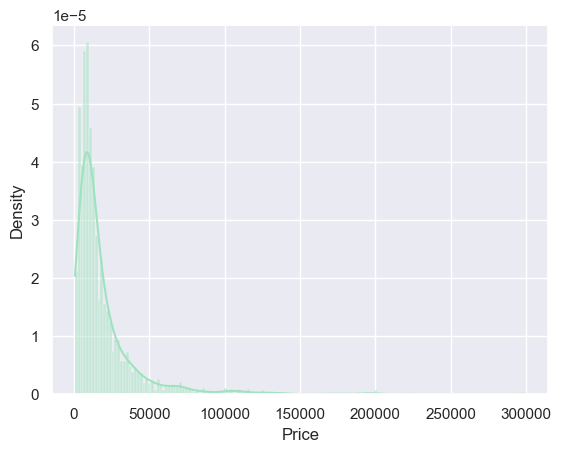

In [51]:
# Display the Probability Distribution Function (PDF) of a variable to spot anomalies, such as outliers
# The PDF will show us how that variable is distributed 
sns.set_palette(["#9FE2BF"]) #seafoam color
sns.histplot(data_no_mv['Price'], kde=True, stat="density", color="#9FE2BF")

- Outliers = observations that lie on abnormal distance from other observations in data.
- One way to remove outliers is to remove top 1% of observations data.
- outliers are situated around the higher prices (right side of the graph)

### Dealing with outliers

In [52]:
# Declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99) #we include 99th percentile, excluding top 1% percentile

# Create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]

# Check that it removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


- Max price has gone down by $778.

<Axes: xlabel='Price', ylabel='Density'>

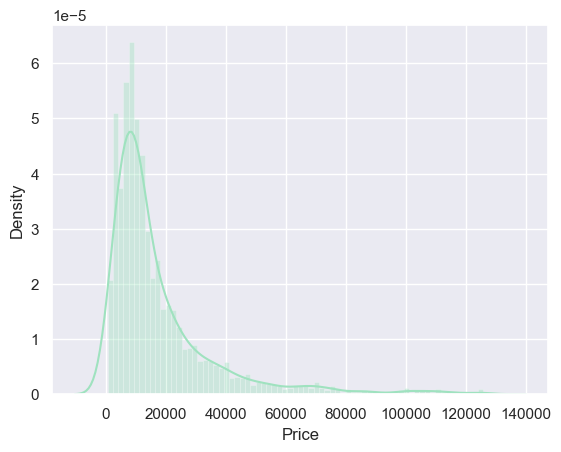

In [53]:
# check the PDF once again to ensure that the result is still distributed in the same way overall
sns.histplot(data_1['Price'], kde=True, stat="density",
             kde_kws=dict(cut=3), alpha=.4, 
             edgecolor=(1, 1, 1, .4), color="#9FE2BF",
            )

- Graph shows right-skewed.

<Axes: xlabel='Mileage', ylabel='Density'>

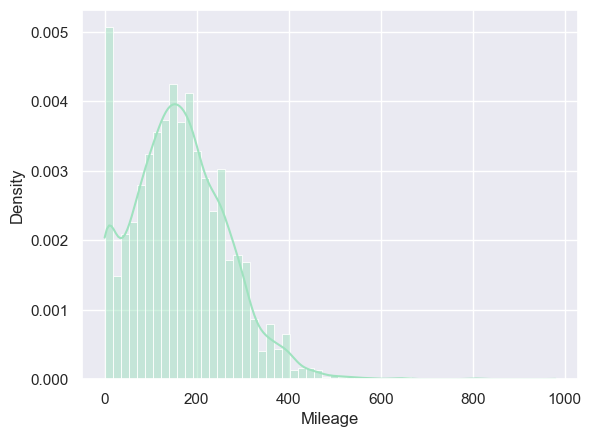

In [54]:
# Check mileage
sns.histplot(data_no_mv['Mileage'], kde = True, stat= "density", color = "#9FE2BF")

- Graph shows right-skewed.

<Axes: xlabel='Mileage', ylabel='Density'>

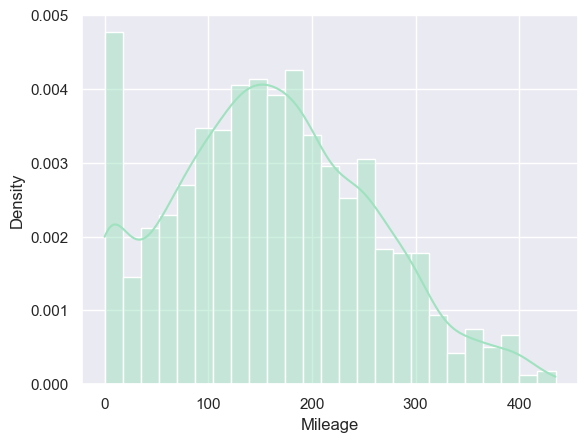

In [55]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'], kde=True, stat="density",color="#9FE2BF")

- There are alot of missing values encoded as 0. 

In [56]:
data_no_mv['Mileage'].value_counts().head(10)

Mileage
0      147
1      111
200     85
250     74
300     70
180     61
160     57
220     46
230     45
150     44
Name: count, dtype: int64

In [57]:
pd.DataFrame(data_no_mv['Mileage']).sort_values(by='Mileage')

,Mileage
4327,0
20,0
5,0
2550,0
2622,0
...,...
3222,650
3457,650
3091,800
3625,810


- Since data seems normal, we proceed with EngineV.

<Axes: xlabel='EngineV', ylabel='Density'>

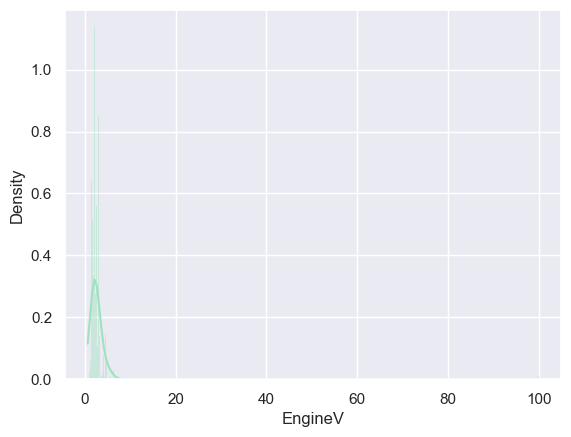

In [58]:
sns.histplot(data_no_mv['EngineV'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='EngineV', ylabel='Density'>

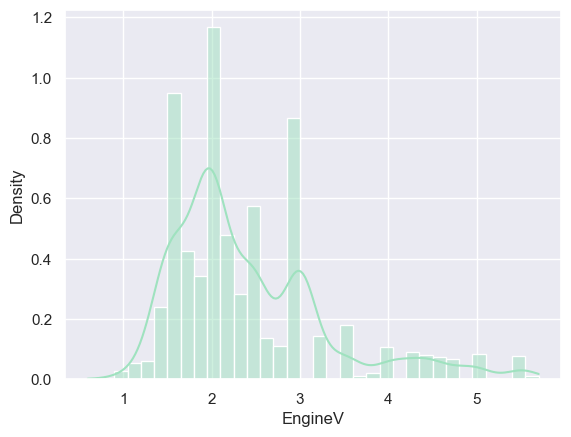

In [59]:
q = data_1['EngineV'].quantile(0.99)
data_3 = data_1[data_1['EngineV']<q]
sns.histplot(data_3['EngineV'], kde=True, stat="density",color="#9FE2BF")

- At first graph of EngineV, distribution was heavy right-skewed. 
- After remvoing 99% percentile, it became normal. 
    - This could mean that are there are missing values classified as fixed high values. 

In [60]:
data_no_mv['EngineV'].value_counts().head(10)

EngineV
2.0    689
3.0    491
2.5    339
1.6    312
2.2    277
1.5    248
1.8    242
1.9    202
1.4    138
2.4    133
Name: count, dtype: int64

In [61]:
pd.DataFrame(data_no_mv['EngineV']).sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2432,1.00
3627,1.00
1923,1.00
...,...
256,99.99
3641,99.99
930,99.99
3114,99.99


-  These missing values are indicated as "99.99", which could be one of the factor issue for the absurb max price of $300k. 

Since 99.99L is too unrealistic, I did a quick google search and these are my findings: 

- Standard Cars: 1.5L to 2.5L (e.g., 1500cc to 2500cc).

- Performance Cars: 3.0L and above.

    - So since max engine volume is about 3.0L+, we set about 6.7L as the max baseline to elimate outliers. 

<Axes: xlabel='EngineV', ylabel='Density'>

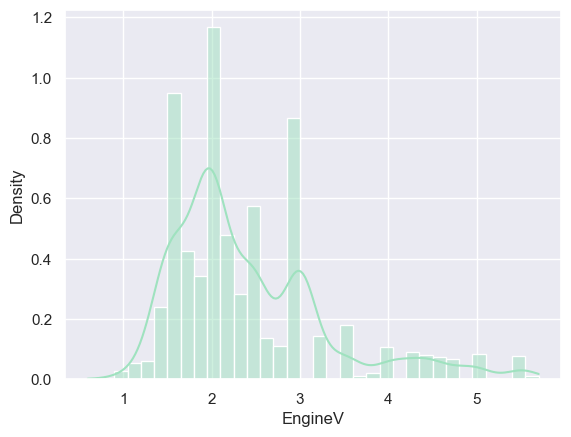

In [62]:
# The natural domain of this variable Car engine volumes are usually between 0.6 to 6.5l (google search)
data_4 = data_3[data_3['EngineV']<6.7]
sns.histplot(data_3['EngineV'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='Year', ylabel='Density'>

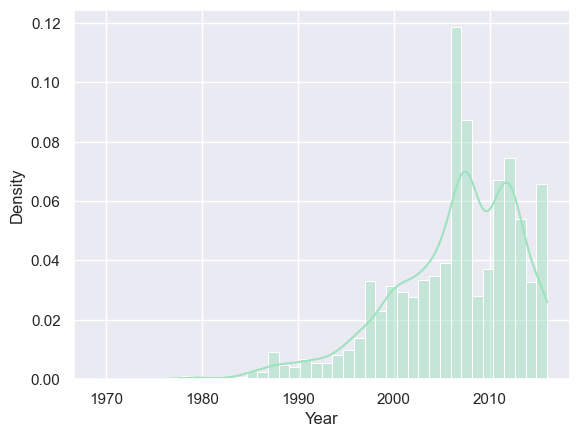

In [63]:
# Outliers are on the low end
sns.histplot(data_no_mv['Year'], kde=True, stat="density",color="#9FE2BF")

- Now it is no longer right-skewed. However, it is heavy left-skewed. 

In [64]:
# Remove 1% bottom percentile
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

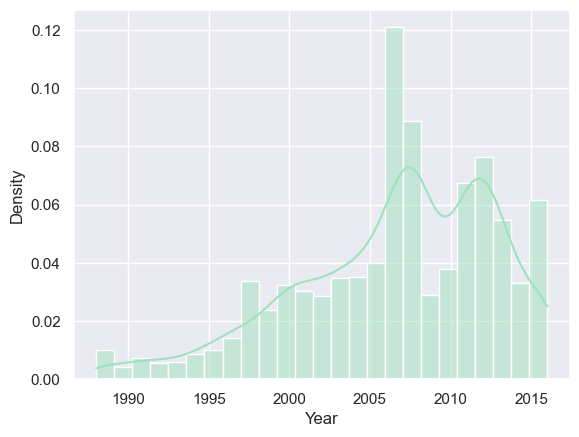

In [65]:
sns.histplot(data_4['Year'], kde=True, stat="density",color="#9FE2BF")

In [66]:
#So we need to reset the indexes so as to go as: 0,1,2,3,4,5 because we initally remove 2 columns from our dataset which became as 0,1,4,5,6. 

# 'drop=True' to completely delete the newly self-created column after we reset the index.
data_cleaned = data_4.reset_index(drop=True)

In [67]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3878,3878.000000,3878,3878.000000,3878.000000,3878,3878,3878.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1466,NaN,NaN,1834,3513,NaN
mean,NaN,17935.781359,NaN,164.446622,2.423917,NaN,NaN,2006.612945
std,NaN,18934.196915,NaN,102.512963,0.898637,NaN,NaN,6.187468
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21150.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


- Max price is still at near 130k. 

## Check the Ordinary Least Square (OLS) assumptions

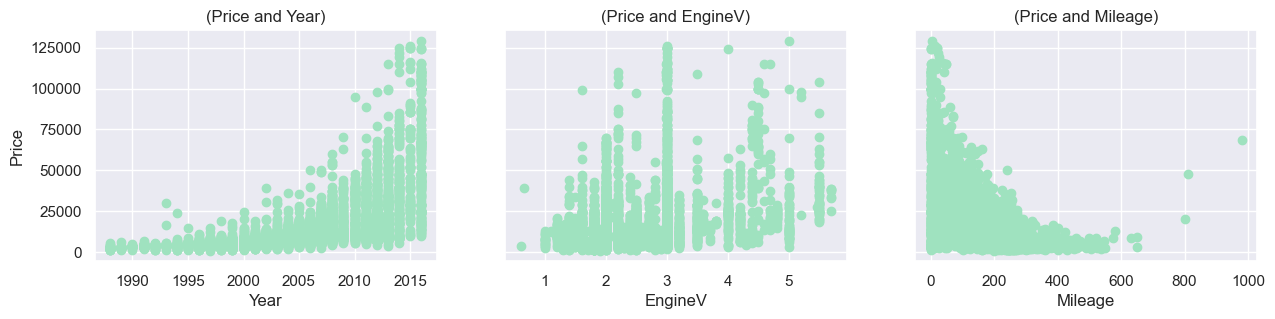

In [68]:
# Plot 3 scatter plot graphs
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' on 3 graph as y-axis

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('(Price and Year)')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('(Price and EngineV)')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('(Price and Mileage)')

ax1.set_ylabel('Price')
ax1.set_xlabel('Year')
ax2.set_xlabel('EngineV')
ax3.set_xlabel('Mileage')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

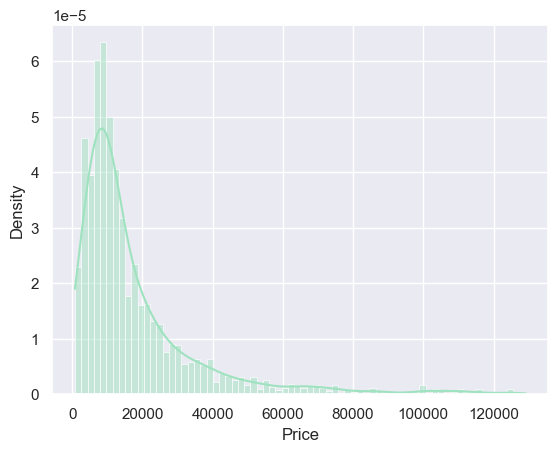

In [69]:
sns.histplot(data_cleaned['Price'], kde=True, stat="density",color="#9FE2BF")

- From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed / skewed distribution
- A good transformation in that case is a log transformation. (etc. ln(4200) = 8.342840)

### Relaxing the assumptions

In [70]:
# Let's transform 'Price' with a log transformation because it is right-skewed distribution
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3873,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3874,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3875,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3876,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


<Axes: xlabel='log_price', ylabel='Density'>

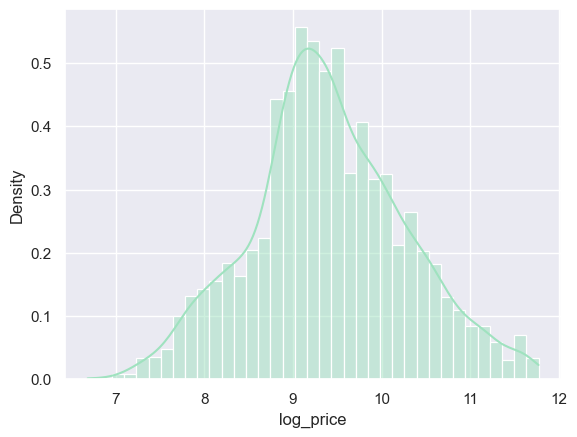

In [71]:
sns.histplot(data_cleaned['log_price'], kde=True, stat="density",color="#9FE2BF")

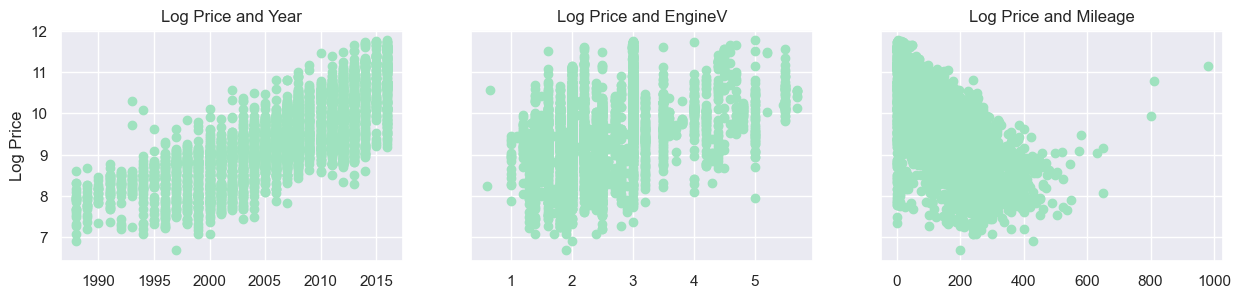

In [72]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
ax1.set_ylabel('Log Price')

plt.show()

# The relationships show a clear and good linear relationship
# Alternatively we could have transformed each of the independent variables

In [73]:
data_cleaned.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [74]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity
- In order to make our model predict better, we need to remove those highly correlated features.
    - These highly correlated features will make it hard for the model to figure out each feature’s effect, which can make coefficient estimates unstable.

    
- It happens when two or more predictor variables in a regression model are highly correlated.
    - Variance Inflation Factor (VIF) measures how much a feature is correlated with other features, by measuring how much the variance (or standard error) of a feature’s coefficient is inflated due to correlation with other features. 
        - VIF = 1: no Multicollinearity (No correlation with other features)
        - VIF = 1 - 5: Semi-Multicollinearity (Moderate correlation, usually OK)
        - VIF > 5: High Multicollinearity (High correlation → consider removing the feature)

In [75]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declare a variable where we put all features to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

# variance_inflation_factor output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.551632,Mileage
1,10.613414,Year
2,8.278981,EngineV


In [77]:
# Since Year has the highest VIF, it will be removed from the model, which drives other variables' VIF down.
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [78]:
data_no_multicollinearity.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Encoding categorical variables
- Linear models require numerical input, so dummies convert categorical variables into numbers while retaining information about each level.
- `pd.get_dummies()` spots all categorical variables and creates dummies automatically
- If we drop the 1st of every column (`drop_first=true`), model will not depend on that 1st column as a reference (baseline for prediction). 
    - This reduces multicollinearity.


In [79]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [80]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange the data frame to be more organized. 

In [81]:
# Check the order of data 
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [82]:
# Declare a new variable that will contain the preferred order
# Most intuitive order: dependent variable (y), indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [128]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


- Our categorical is still not numerical as it shows "True" and "False".

In [129]:
# Select only boolean columns
bool_cols = data_preprocessed.select_dtypes(include='bool').columns

# Converts true and false as 1 and 0:
data_preprocessed[bool_cols] = data_preprocessed[bool_cols].astype(int)
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3874,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3875,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3876,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [130]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs include all colmuns except the dependent variable y (log_price) 
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

- It is difficit to compare different measurement units such as 277	mileage and  8.342840 log_price
- Solution: we scale them into comparable values using various methods such as standardization: new_value = (orignal_value - x̄) / σ

In [131]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [132]:
# Actual scaling process
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [133]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [134]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [135]:
# store outputs of the regression in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

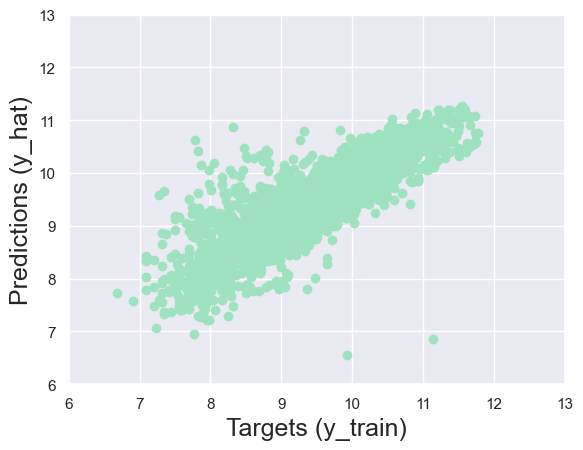

In [136]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

- The closer the points to the 45-degree line (line from (6,6) to (13,13)), the better the prediction
- For example, if the point for prediction y-axis is 7, we want this point to be as close at target x-axis 7 also
- In this case, y_hat at point 7.5, y_train is at 6.9 which means that predictions are abit higer than target.
- We want the x-axis and the y-axis to be the same to get the most perfect prediction
- Sometimes, the plot will have different scales of the x-axis and the y-axis, which is harder to interpret the '45-degree line'. Thus, use "Residual plot" in addition.

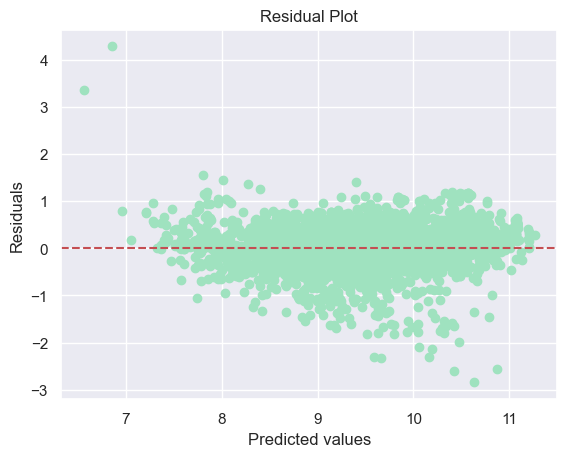

In [137]:
# Residual plot
plt.scatter(y_hat, y_train - y_hat)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

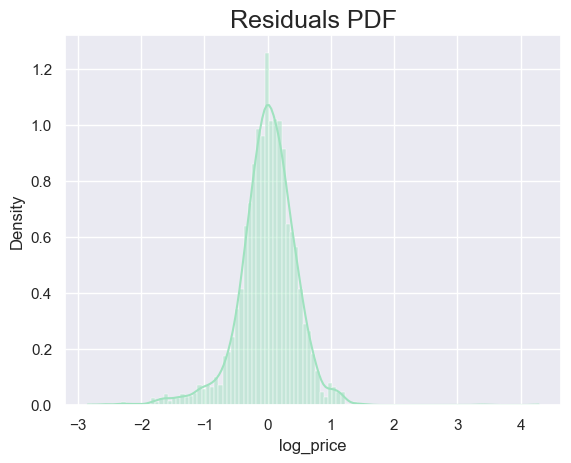

In [138]:
# Plot the PDF of the residuals and check for anomalies
# The error must be normally distributed with a  mean of zero.
# The residuals are the estimates of the errors 
sns.histplot(y_train - y_hat, kde=True, stat="density", color="#9FE2BF") #(actual - predicted values)
plt.title("Residuals PDF", size=18)

- From the graph, mean is zero and it is negatively skewed (left tail is longer - many negative residuals)
- Since (y_train - y_hat) is much lower than the mean, this imply that y_hat (predictions) are much higher than y_train (targets)
- This also means the predictions overestimates the target, and rarely understimates it (since it's less positive skewed)

In [139]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.7212322087671399

- Our model is explaining 72.1% of variability of data, which is considered safe

### Finding the weights and bias

In [140]:
# Obtain the bias (intercept) of the regression (to get baseline/starting point prediction)
print(reg.intercept_)

9.398768714378711


In [141]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.44245916,  0.20374441,  0.01383345,  0.01833104, -0.13361451,
       -0.17807568, -0.05682419, -0.0829643 , -0.14777832, -0.11170623,
       -0.21281181, -0.13629021, -0.18138165, -0.13293938, -0.02901227,
       -0.15086497,  0.32829228])

In [142]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.442459
1,EngineV,0.203744
2,Brand_BMW,0.013833
3,Brand_Mercedes-Benz,0.018331
4,Brand_Mitsubishi,-0.133615
5,Brand_Renault,-0.178076
6,Brand_Toyota,-0.056824
7,Brand_Volkswagen,-0.082964
8,Body_hatch,-0.147778
9,Body_other,-0.111706


- Positive weights shows feature increase, log price / price increase
- negative weights shows feature increase, log price / price decrease
- Notices that 1 brand is drop when we creating dummy variables. 
    - This brand will be the benchmark / reference category.

In [143]:
# Checking which brand was dropped:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

- Since Audi is dropped while all other dummies are zero, this makes Audi the benchmark
- Back to the graph above, a positive weight such as brand BMW and Mercedes_Benz imply that they are more expensive than the benchmark Audi.
- While a negative weight such as other brands above graph imply that they are less expensive than Audi

## Test

In [144]:
y_hat_test = reg.predict(x_test)

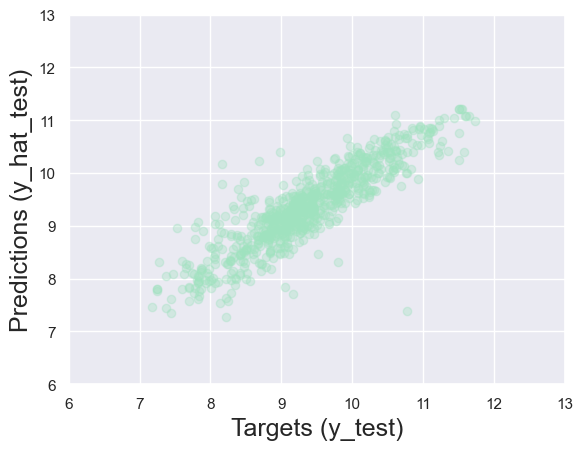

In [145]:
# Scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.34) #alpha = 1 full opacity, alpha = 0 fully transparent
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# The more staurated the color, the higher the concentraion

In [146]:
# To obtain the actual prices (not log prices), take the exponential of the log_price with np.exp()
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf 

,Prediction
0,73542.204132
1,12114.817423
2,8243.726574
3,11537.707522
4,8556.294598
...,...
771,31690.397246
772,12323.486642
773,21904.048977
774,7118.415710


In [147]:
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,73542.204132,NaN
1,12114.817423,7900.0
2,8243.726574,NaN
3,11537.707522,NaN
4,8556.294598,NaN
...,...,...
771,31690.397246,NaN
772,12323.486642,NaN
773,21904.048977,NaN
774,7118.415710,NaN


- Note that lot of missing values (Target) suggests that something is wrong with the data frame / indexing

In [148]:
# Check what's wrong with data frame
y_test.head(5)

2424    11.512915
3457     9.680344
1881     8.665613
1396     9.137770
3692     8.895630
Name: log_price, dtype: float64

- Upon inspecting this data frame, we can see that old indexes are still preserved
- Solution: forget this original indexing 

In [149]:
# Reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    11.512915
1     9.680344
2     8.665613
3     9.137770
4     8.895630
Name: log_price, dtype: float64

In [150]:
# Overwrite the 'Target' column with the appropriate values again
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,73542.204132,99999.0
1,12114.817423,16000.0
2,8243.726574,5800.0
3,11537.707522,9300.0
4,8556.294598,7300.0
...,...,...
771,31690.397246,44800.0
772,12323.486642,9500.0
773,21904.048977,31500.0
774,7118.415710,8300.0


In [151]:
# Calculate the difference between the targets and the predictions (to see how far target and prediction is)
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [152]:
# See how far off the predicted is from the target in form of result percentage-wise / residual difference %
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,73542.204132,99999.0,26456.795868,26.457060
1,12114.817423,16000.0,3885.182577,24.282391
2,8243.726574,5800.0,-2443.726574,42.133217
3,11537.707522,9300.0,-2237.707522,24.061371
4,8556.294598,7300.0,-1256.294598,17.209515
...,...,...,...,...
771,31690.397246,44800.0,13109.602754,29.262506
772,12323.486642,9500.0,-2823.486642,29.720912
773,21904.048977,31500.0,9595.951023,30.463337
774,7118.415710,8300.0,1181.584290,14.235955


In [153]:
# descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,776.000000,776.000000,776.000000,776.000000
mean,15467.363124,17255.709072,1788.345949,31.951772
std,12517.210692,17961.297363,9294.139551,46.179328
min,1441.813131,1300.000000,-25654.260715,0.093147
25%,7296.882481,6900.000000,-2035.256317,9.144783
50%,11464.433930,10999.000000,68.207847,21.824093
75%,20077.232522,20924.750000,2842.621392,37.705260
max,73542.204132,124000.000000,73991.779740,653.618105


- minimum different, 25%, 50%, 75% are very accurate
- However, the max differece is not accurate.

In [154]:
# Sometimes it is useful to check these outputs manually
pd.options.display.max_rows = 20 # To see 20 rows
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
463,30921.17,30950.00,28.83,0.09
707,11011.73,10999.00,-12.73,0.12
526,9021.87,8999.00,-22.87,0.25
304,5781.53,5800.00,18.47,0.32
78,35379.00,35500.00,121.00,0.34
...,...,...,...,...
647,32551.32,8000.00,-24551.32,306.89
5,7780.22,1850.00,-5930.22,320.55
384,27715.43,5900.00,-21815.43,369.75
431,18008.76,3500.00,-14508.76,414.54


In [155]:
#Mean Absolute Percentage Error (MAPE)
# Calculate the absolute difference percentage
df_pf['Abs Difference%'] = df_pf['Difference%'].abs()

# Calculate Mean Absolute Percentage Error (MAPE)
mean_error_percentage = df_pf['Abs Difference%'].mean()

# Calculate accuracy percentage
accuracy_percentage = 100 - mean_error_percentage

print("MAPE: {:.2f}%".format(mean_error_percentage )) # Model's predictions are off by (MAPE)% from the actual prices
print("Average Accuracy: {:.2f}%".format(accuracy_percentage))

MAPE: 31.95%
Average Accuracy: 68.05%


## In conclusion
- Our model is using mileage, engine volume, brand, registration and body type to predict the price of a used car with an accuracy R-squared score of 72.1% and MAPE of 31.95%
- On average, our model is fairly accurate at predicting prices. However, the predictions tend to overestimate the target price.
- Possible improvements to our model:
  1. Remove a bigger part of the outliers
  2. Use different kinds of transformations

In [174]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error


df_alt = data_preprocessed.copy()

# 2. Remove a bigger part of the outliers (quantile-based trimming)
q_low = df_alt.quantile(0.10)
q_high = df_alt.quantile(0.99)

df_alt = df_alt[
    ~((df_alt < q_low) | (df_alt > q_high)).any(axis=1)
]

# 3. Apply multiple transformations

# Power transform skewed numerical features
num_cols = ['Mileage', 'EngineV']
pt = PowerTransformer(method='yeo-johnson')
df_alt[num_cols] = pt.fit_transform(df_alt[num_cols])

# Split
X_alt = df_alt.drop('log_price', axis=1)
y_alt = df_alt['log_price']

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.2, random_state=42
)

# Scale
scaler_alt = StandardScaler()
X_train_alt = scaler_alt.fit_transform(X_train_alt)
X_test_alt = scaler_alt.transform(X_test_alt)

# Train model
reg_alt = LinearRegression()
reg_alt.fit(X_train_alt, y_train_alt)

# Evaluate
y_pred_alt = reg_alt.predict(X_test_alt)

r2_alt = r2_score(y_test_alt, y_pred_alt)
rmse_alt = np.sqrt(mean_squared_error(y_test_alt, y_pred_alt))

r2_alt, rmse_alt

(0.7257468331781882, np.float64(0.32798582935250803))

- Upon making these improvements, the new model's R-Square accuracy is 72.6%, which an increase of only 0.45%.